In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [2]:
def Hz1(z1,H01,Om1,Ode1,w0,w1):
    #Ode1=1.-Om1
   #the redshift dependence of the dark energy density using Jassal parametrization w(z)=w_0 +\ w_1{z \over {(1+z)}^2}:
    I=((1+z1)**(3*(1+w0)))*np.exp((3*w1*z1**2)/(2*(1+z1)**2))
    E = np.sqrt((Om1*(1+z1)**3.) + Ode1*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 6., num=num_zs)

In [4]:
O_m=0.3029
w_0=-0.9414
w_1=0.95
H_0=68.5265
O_de=1.-O_m

In [5]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,O_de,w_0,w_1)/(1+zs)

In [6]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [7]:
H_zz= Hz + e1

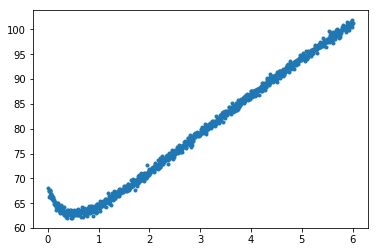

In [8]:
plt.plot(zs,H_zz, '.')

In [9]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('Ode1',0.7,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w0',-1.,True,-3.,3.),
           ('w1',0.2,True,0.,1.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['Ode1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma

In [10]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 1000
    # variables        = 5
    chi-square         = 1001.42351
    reduced chi-square = 1.00645579
    Akaike info crit   = 11.4224966
    Bayesian info crit = 35.9612730
[[Variables]]
    Om1:   0.30992352 +/- 1989.15251 (641820.43%) (init = 0.3)
    Ode1:  0.70315013 +/- 4512.96405 (641820.83%) (init = 0.7)
    H01:   67.7663914 +/- 218491.168 (322418.18%) (init = 70)
    w0:   -0.91803228 +/- 0.01931893 (2.10%) (init = -1)
    w1:    0.84953684 +/- 0.08825029 (10.39%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01)  = -1.000
    C(Om1, Ode1) =  1.000
    C(Ode1, H01) = -1.000
    C(w0, w1)    = -0.988


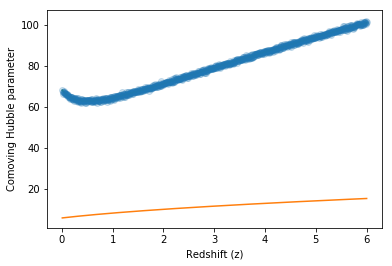

In [11]:
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='o',alpha=0.2)
bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,Hz1(zs,bestOde1,bestH01,bestOm1,bestw0,bestw1)/(1+zs))
plt.plot(zs,Hz)
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Hubble parameter')
lmfit.report_fit(mi)

In [ ]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)